In [1]:
# Import Libraries
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import seaborn as sns
import earthpy as et
import earthpy.plot as ep
import scipy

In [2]:
# Working directory
work_dir = '/Users/arbailey/natcap/idb/data/work/mangroves/srtm/'
os.chdir(work_dir)
gmf_hmax_source = os.path.join(work_dir, 'gmf_srtm_hmax_MexBlz.vrt')
gmw2016_hmax_source = os.path.join(work_dir, 'gmw2016_srtm_hmax_MexBlz.vrt')
wam_hmax_source = os.path.join(work_dir, 'wam_srtm_hmax_MexBlz.vrt')
ncmar_hmax_soure = os.path.join(work_dir, 'ncmar_srtm_hmax_MexBlz.vrt')

In [3]:
# Read in the max height rasters - GMF
with rio.open(gmf_hmax_source) as src:
    gmf_hmax = src.read(1, masked=True)
# GMW 2016 raster
with rio.open(gmw2016_hmax_source) as src:
    gmw2016_hmax = src.read(1, masked=True)
# WAM 
with rio.open(wam_hmax_source) as src:
    wam_hmax = src.read(1, masked=True)
# TNC
with rio.open(ncmar_hmax_soure) as src:
    ncmar_hmax = src.read(1, masked=True)

In [47]:
def hist_manghgt(data_np, title_text):
    sns.set(font_scale=2.5, style="whitegrid")
    fig, ax = ep.hist(data_np, 
        bins = np.arange(42), # [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        colors=['brown'],
        title=title_text,
        xlabel='Max Canopy Height (m)',
        ylabel='Number of Pixels') 
    ax.set_xticks(range(0,42,5))
    return (fig, ax)

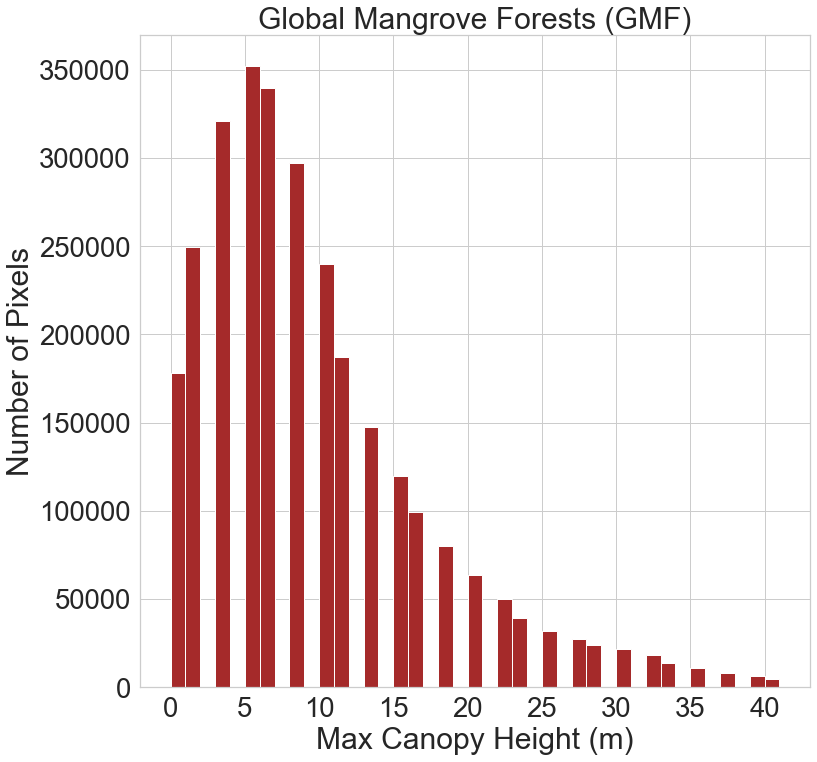

In [48]:
gmf_hmax_hist = hist_manghgt(gmf_hmax, 'Global Mangrove Forests (GMF)')

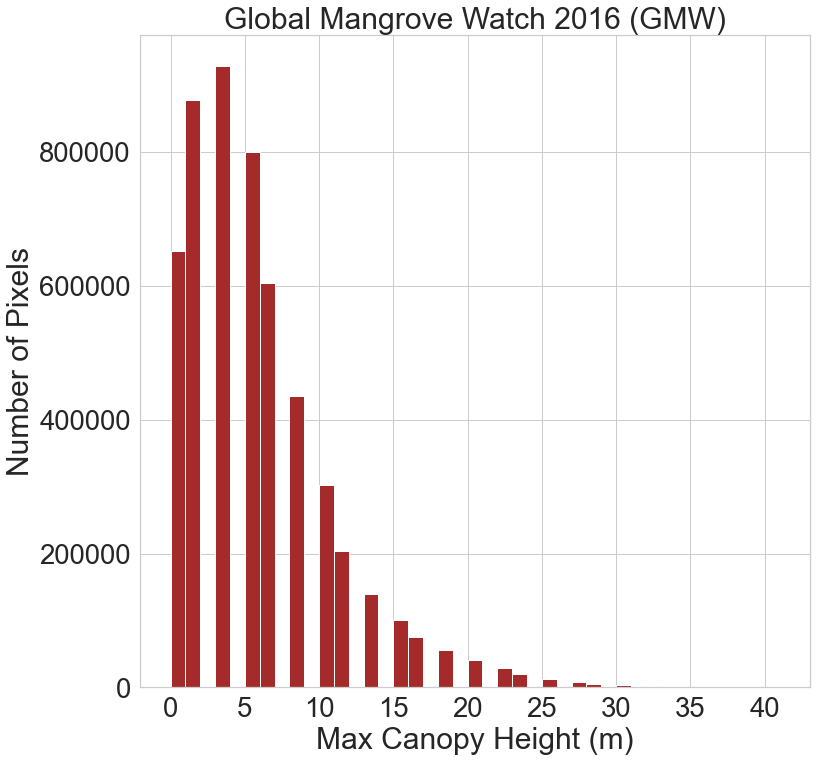

In [49]:
gmw2016_hmax_hist = hist_manghgt(gmw2016_hmax, 'Global Mangrove Watch 2016 (GMW)')

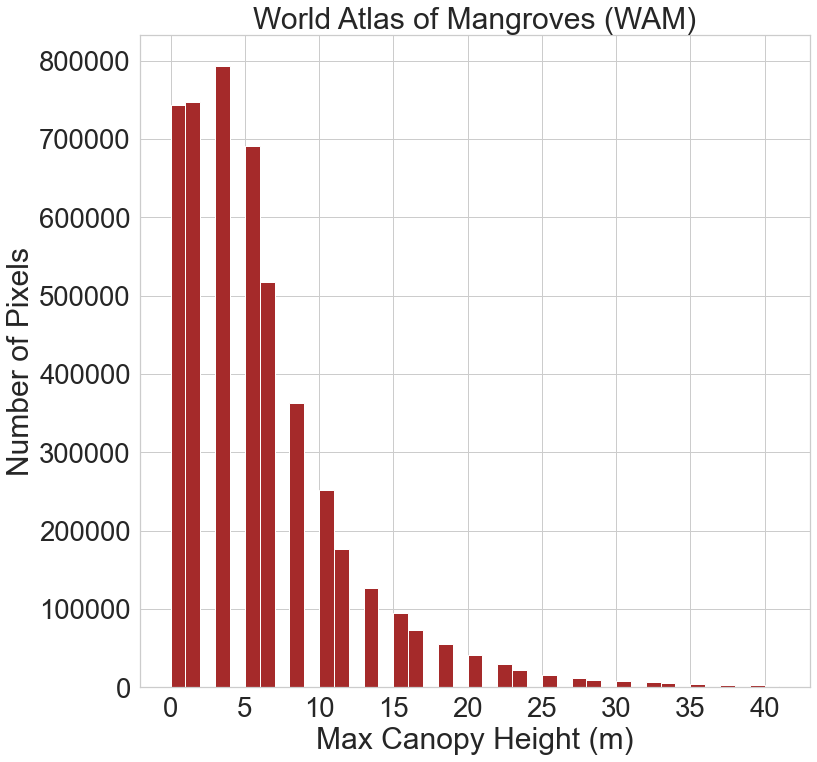

In [50]:
wam_hmax_hist = hist_manghgt(wam_hmax, 'World Atlas of Mangroves (WAM)')

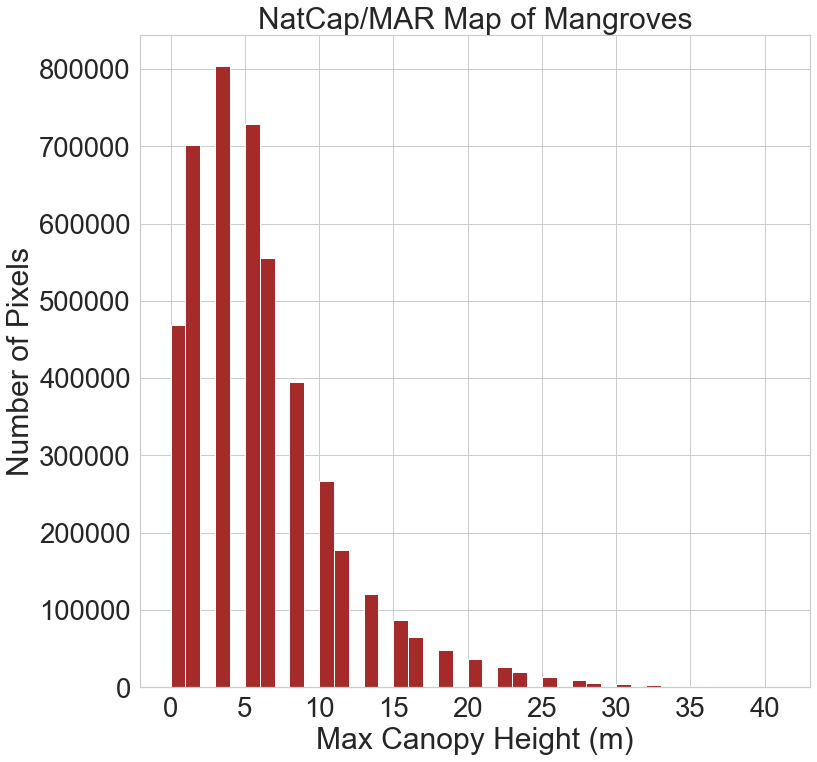

In [51]:
ncmar_hmax_hist = hist_manghgt(ncmar_hmax, 'NatCap/MAR Map of Mangroves')

In [9]:
# See the values in each bin of the histogram
def hist_table(data):
    counts,bins = np.histogram(data, bins=np.arange(56)) # 54.3 is max value for Andros TanDEM-X canopy heights
    print("counts:", counts)
    print("bins:", bins)

In [10]:
hist_table(gmf_hmax)
print(np.min(gmf_hmax))
print(np.max(gmf_hmax))

counts: [178249 249555      0 320794      0 352179 339791      0 297426      0
 240048 187278      0 147465      0 119722  99313      0  80135      0
  63657      0  49790  39277      0  32133      0  27396  24171      0
  21607      0  18113  13997      0  10899      0   8320      0   6463
   4611      0   3149      0   1811    927      0    418      0    316
    179      0    142      0    124]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
-78.062
1208.264


In [11]:
hist_table(gmw2016_hmax)
print(np.min(gmw2016_hmax))
print(np.max(gmw2016_hmax))

counts: [652665 878232      0 928930      0 800962 605139      0 435191      0
 302004 203390      0 139297      0 100267  74945      0  55706      0
  40608      0  28625  19201      0  12449      0   7686   4558      0
   2734      0   1800   1189      0    798      0    496      0    325
    214      0    150      0     69     29      0     10      0      6
      8      0      4      0      6]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
-54.304
115.396


In [12]:
hist_table(wam_hmax)
print(np.min(wam_hmax))
print(np.max(wam_hmax))

counts: [743059 747899      0 793193      0 691217 517472      0 362537      0
 251894 176540      0 127015      0  94311  73170      0  55442      0
  40650      0  30173  21987      0  16054      0  11901   9031      0
   7472      0   6562   5592      0   4595      0   3549      0   2858
   1952      0   1354      0    873    627      0    510      0    371
    308      0    225      0    184]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
-91.638
218.913


In [13]:
hist_table(ncmar_hmax)
print(np.min(ncmar_hmax))
print(np.max(ncmar_hmax))

counts: [468907 702283      0 803934      0 728730 555009      0 394939      0
 267542 177321      0 121162      0  87094  65735      0  48877      0
  36106      0  26766  19202      0  13245      0   8969   5983      0
   4000      0   2933   2040      0   1382      0    911      0    586
    375      0    254      0    155    100      0     70      0     59
     39      0     17      0     21]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
-59.395
212.125


In [14]:
gmf_hmax

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-32768.0,
  dtype=float32)

In [15]:
gmf_hmax.count()

3037838

In [16]:
np.ma.count_masked(gmf_hmax)

426682034

In [17]:
gmw2016_hmax.count()

5796875

In [18]:
wam_hmax.count()

5231642

In [19]:
ncmar_hmax.count()

4861358